# Homework 2 - CSCE 633
## Arya Rahmanian

### Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import copy

## Part A - Logistic Regression

In [2]:
df = pd.read_csv("hitters.csv")

In [66]:
print(df.head() , "\n")
print("The shape of the dataset before preprocessing is: ", df.shape)

df.dropna(inplace=True)

              Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   
5   -Alfredo Griffin    594   169      4    74   51     35     11    4408   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   
5   1133  ...    501   336     194       A        W     282      421      25   

   Salary  NewLeague  
1   475.0          1  
2   480.0 

In [67]:
# Extracting labels and features
X = df[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','League','Division','PutOuts','Assists','Errors','Salary']]
y = df[['NewLeague']]

### One-hot encoding for categorical features

In [68]:
# select numbers
X_cat = X.select_dtypes(exclude=['int64', 'float64'])                                                                                                         
X_dog = X.select_dtypes(include=['int64', 'float64'])                                                                                                         
                                                                                                                                                              
X_cat = pd.get_dummies(X_cat)                                                                                                                                 
X = pd.concat([X_cat, X_dog], axis=1)   

In [69]:
NewLeague2number_dict = {
    'A':0,
    'N':1
}

y=y.replace({"NewLeague": NewLeague2number_dict})

### Transform labels

In [70]:
label.replace('A', 0, inplace=True)
label.replace('N', 1, inplace=True)

## Split Data

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.astype(np.int64)
X_test = X_test.astype(np.int64)
print(X_train.head())
print(y_train.head())

     League_A  League_N  Division_E  Division_W  AtBat  Hits  HmRun  Runs  \
177         1         0           1           0    441   118     28    84   
184         0         1           1           0    586   159     12    72   
91          0         1           1           0    475   123     27    76   
3           0         1           1           0    496   141     20    65   
162         1         0           0           1    165    39      2    13   

     RBI  Walks  ...  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks  PutOuts  \
177   86     68  ...    2723    750     126    433   420     309      190   
184   79     53  ...    3082    880      83    363   477     295      181   
91    93     72  ...    1810    471     108    292   343     267      226   
3     78     37  ...    5628   1575     225    828   838     354      200   
162    9     16  ...     196     44       2     18    10      18      332   

     Assists  Errors  Salary  
177        2       2    1300  
184       13

## Logistic Regression

In [184]:
class LogisticRegression():
    def __init__(self, learning_rate=0.1, iterations=1000 ):
        self.losses = []
        self.train_accuracies = []
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def fit(self, x, y):
        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(self.iterations):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - (self.learning_rate * error_w)
        self.bias = self.bias - (self.learning_rate * error_b)

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.4 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.reshape(y.shape[0], 1)


In [123]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def sigmoid(self,z):
        print(z)
        sig = 1/(1+np.exp(-z))
        return sig
        
    def initialize(self,X):
        weights = np.zeros((X.shape[1]+1,1))
        X = np.c_[np.ones((X.shape[0],1)),X]
        return weights,X
    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)
        def cost(theta):
            z = np.dot(X, theta)
            cost0 = y.T.dot(np.log(self.sigmoid(z)))
            cost1 = (1 - y).T.dot(np.log(1 - self.sigmoid(z)))
            cost = -((cost1 + cost0)) / len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha * np.dot(X.T, (self.sigmoid(np.dot(X, weights)) - y.reshape(-1, 1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list

    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])
    
    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

In [238]:
class LogisticRegression():
    def __init__(self):
        self.losses = []
        self.train_accuracies = []

    def fit(self, x, y, epochs):
        x = self._transform_x(x)
        y = self._transform_y(y)

        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.reshape(y.shape[0], 1)

In [227]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def sigmoid(self, z):
        # Using a stable sigmoid function
        return np.where(z >= 0, 
                        1 / (1 + np.exp(-z)), 
                        np.exp(z) / (1 + np.exp(z)))
        
    def fit(self, X, y):
        # Ensure y is a 1D array
        y = y.flatten()
        
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for _ in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            # Calculate gradients
            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.sum(y_pred - y) / len(y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return [1 if p > 0.5 else 0 for p in y_pred]
    
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

In [268]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # Sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def fit(self, X, Y):
        # Weight initialization
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        
        # Data
        self.X = X
        self.Y = Y
        
        # Gradient descent learning to update the weights in each iteration
        for i in range(self.iterations):
            self.update_weights()
    
    # Helper function to update weights in gradient descent
    def update_weights(self):
        Y_pred = self.predict(self.X)
        error = Y_pred - self.Y
        
        dW = np.dot(self.X.T, error) / self.m
        db = np.sum(error) / self.m
        
        self.W -= np.dot(self.learning_rate, dW)
        self.b -= np.dot(self.learning_rate, db)
    
    # Predict function
    def predict(self, X):
        linear_model = np.dot(X, self.W) + self.b
        return self.sigmoid(linear_model)
    
    # Compute loss function
    def compute_loss(self):
        Y_pred = self.predict(self.X)
        return -np.mean(self.Y * np.log(Y_pred + 1e-8) + (1 - self.Y) * np.log(1 - Y_pred + 1e-8))
    
    # Function to predict binary labels
    def predict_labels(self, X, threshold=0.5):
        probabilities = self.predict(X)
        return (probabilities >= threshold).astype(int)


In [274]:
# Ensure the shapes are correct: (number of samples, number of features)
X_train_np = X_train.to_numpy()  # should be (number of training samples, number of features)
X_test_np = X_test.to_numpy()  # should be (number of test samples, number of features)
y_train_np = y_train.to_numpy().reshape(-1,1)  # should be (number of training samples, 1)
y_test_np = y_test.to_numpy().reshape(-1,1)  # should be (number of test samples, 1)

print(f'X_train_np shape: {X_train_np.shape}')
print(f'X_test_np shape: {X_test_np.shape}')
print(f'y_train_np shape: {y_train_np.shape}')
print(f'y_test_np shape: {y_test_np.shape}')

# Initialize and train the model

model = LogisticRegression(learning_rate=0.0001, iterations=500)
model.fit(X_train_np, y_train_np)

# Make predictions
predictions = model.predict(X_test_np)
#print(predictions)

# Calculate ROC curve and AUROC
fpr, tpr, _ = roc_curve(y_test_np.flatten(), probabilities)
roc_auc = roc_auc_score(y_test_np.flatten(), probabilities)
print(f'AUROC: {roc_auc}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

X_train_np shape: (184, 21)
X_test_np shape: (79, 21)
y_train_np shape: (1, 184)
y_test_np shape: (1, 79)


ValueError: non-broadcastable output operand with shape (21,1) doesn't match the broadcast shape (21,184)

Accuracy: 0.9367088607594937
AUROC: 0.9666666666666666


E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


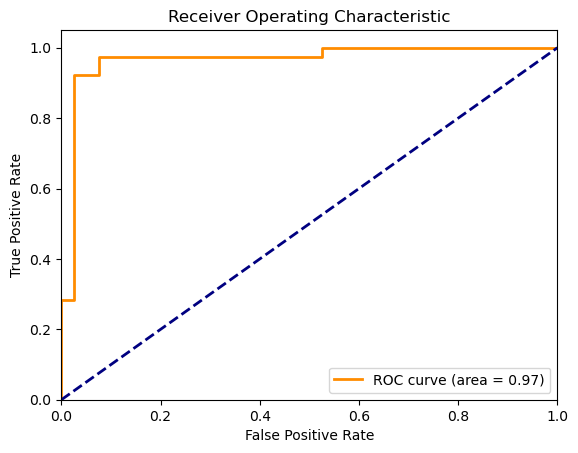

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_np, y_train_np)

# Make predictions
predictions = model.predict(X_test_np)

# Calculate accuracy
accuracy = accuracy_score(y_test_np, predictions)
print(f'Accuracy: {accuracy}')

# Get prediction probabilities for ROC curve
probabilities = model.predict_proba(X_test_np)[:, 1]

# Calculate ROC curve and AUROC
fpr, tpr, _ = roc_curve(y_test_np, probabilities)
roc_auc = roc_auc_score(y_test_np, probabilities)
print(f'AUROC: {roc_auc}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()